# PDF and Images Content Extraction for Large Language Models

In [1]:
#!pip install -U pypdfium2

In [1]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [2]:
def convert_pdf_to_images(file_path, scale=300/72):
    
    pdf_file = pdfium.PdfDocument(file_path)  
    page_indices = [i for i in range(len(pdf_file))]
    
    renderer = pdf_file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices, 
        scale = scale,
    )
    
    list_final_images = [] 
    
    for i, image in zip(page_indices, renderer):
        
        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))
    
    return list_final_images

In [3]:
def display_images(list_dict_final_images):
    
    all_images = [list(data.values())[0] for data in list_dict_final_images]

    for index, image_bytes in enumerate(all_images):

        image = Image.open(BytesIO(image_bytes))
        figure = plt.figure(figsize = (image.width / 100, image.height / 100))

        plt.title(f"----- Page Number {index+1} -----")
        plt.imshow(image)
        plt.axis("off")
        plt.show()

In [4]:
convert_pdf_to_images = convert_pdf_to_images('1.pdf')

In [5]:
#convert_pdf_to_images

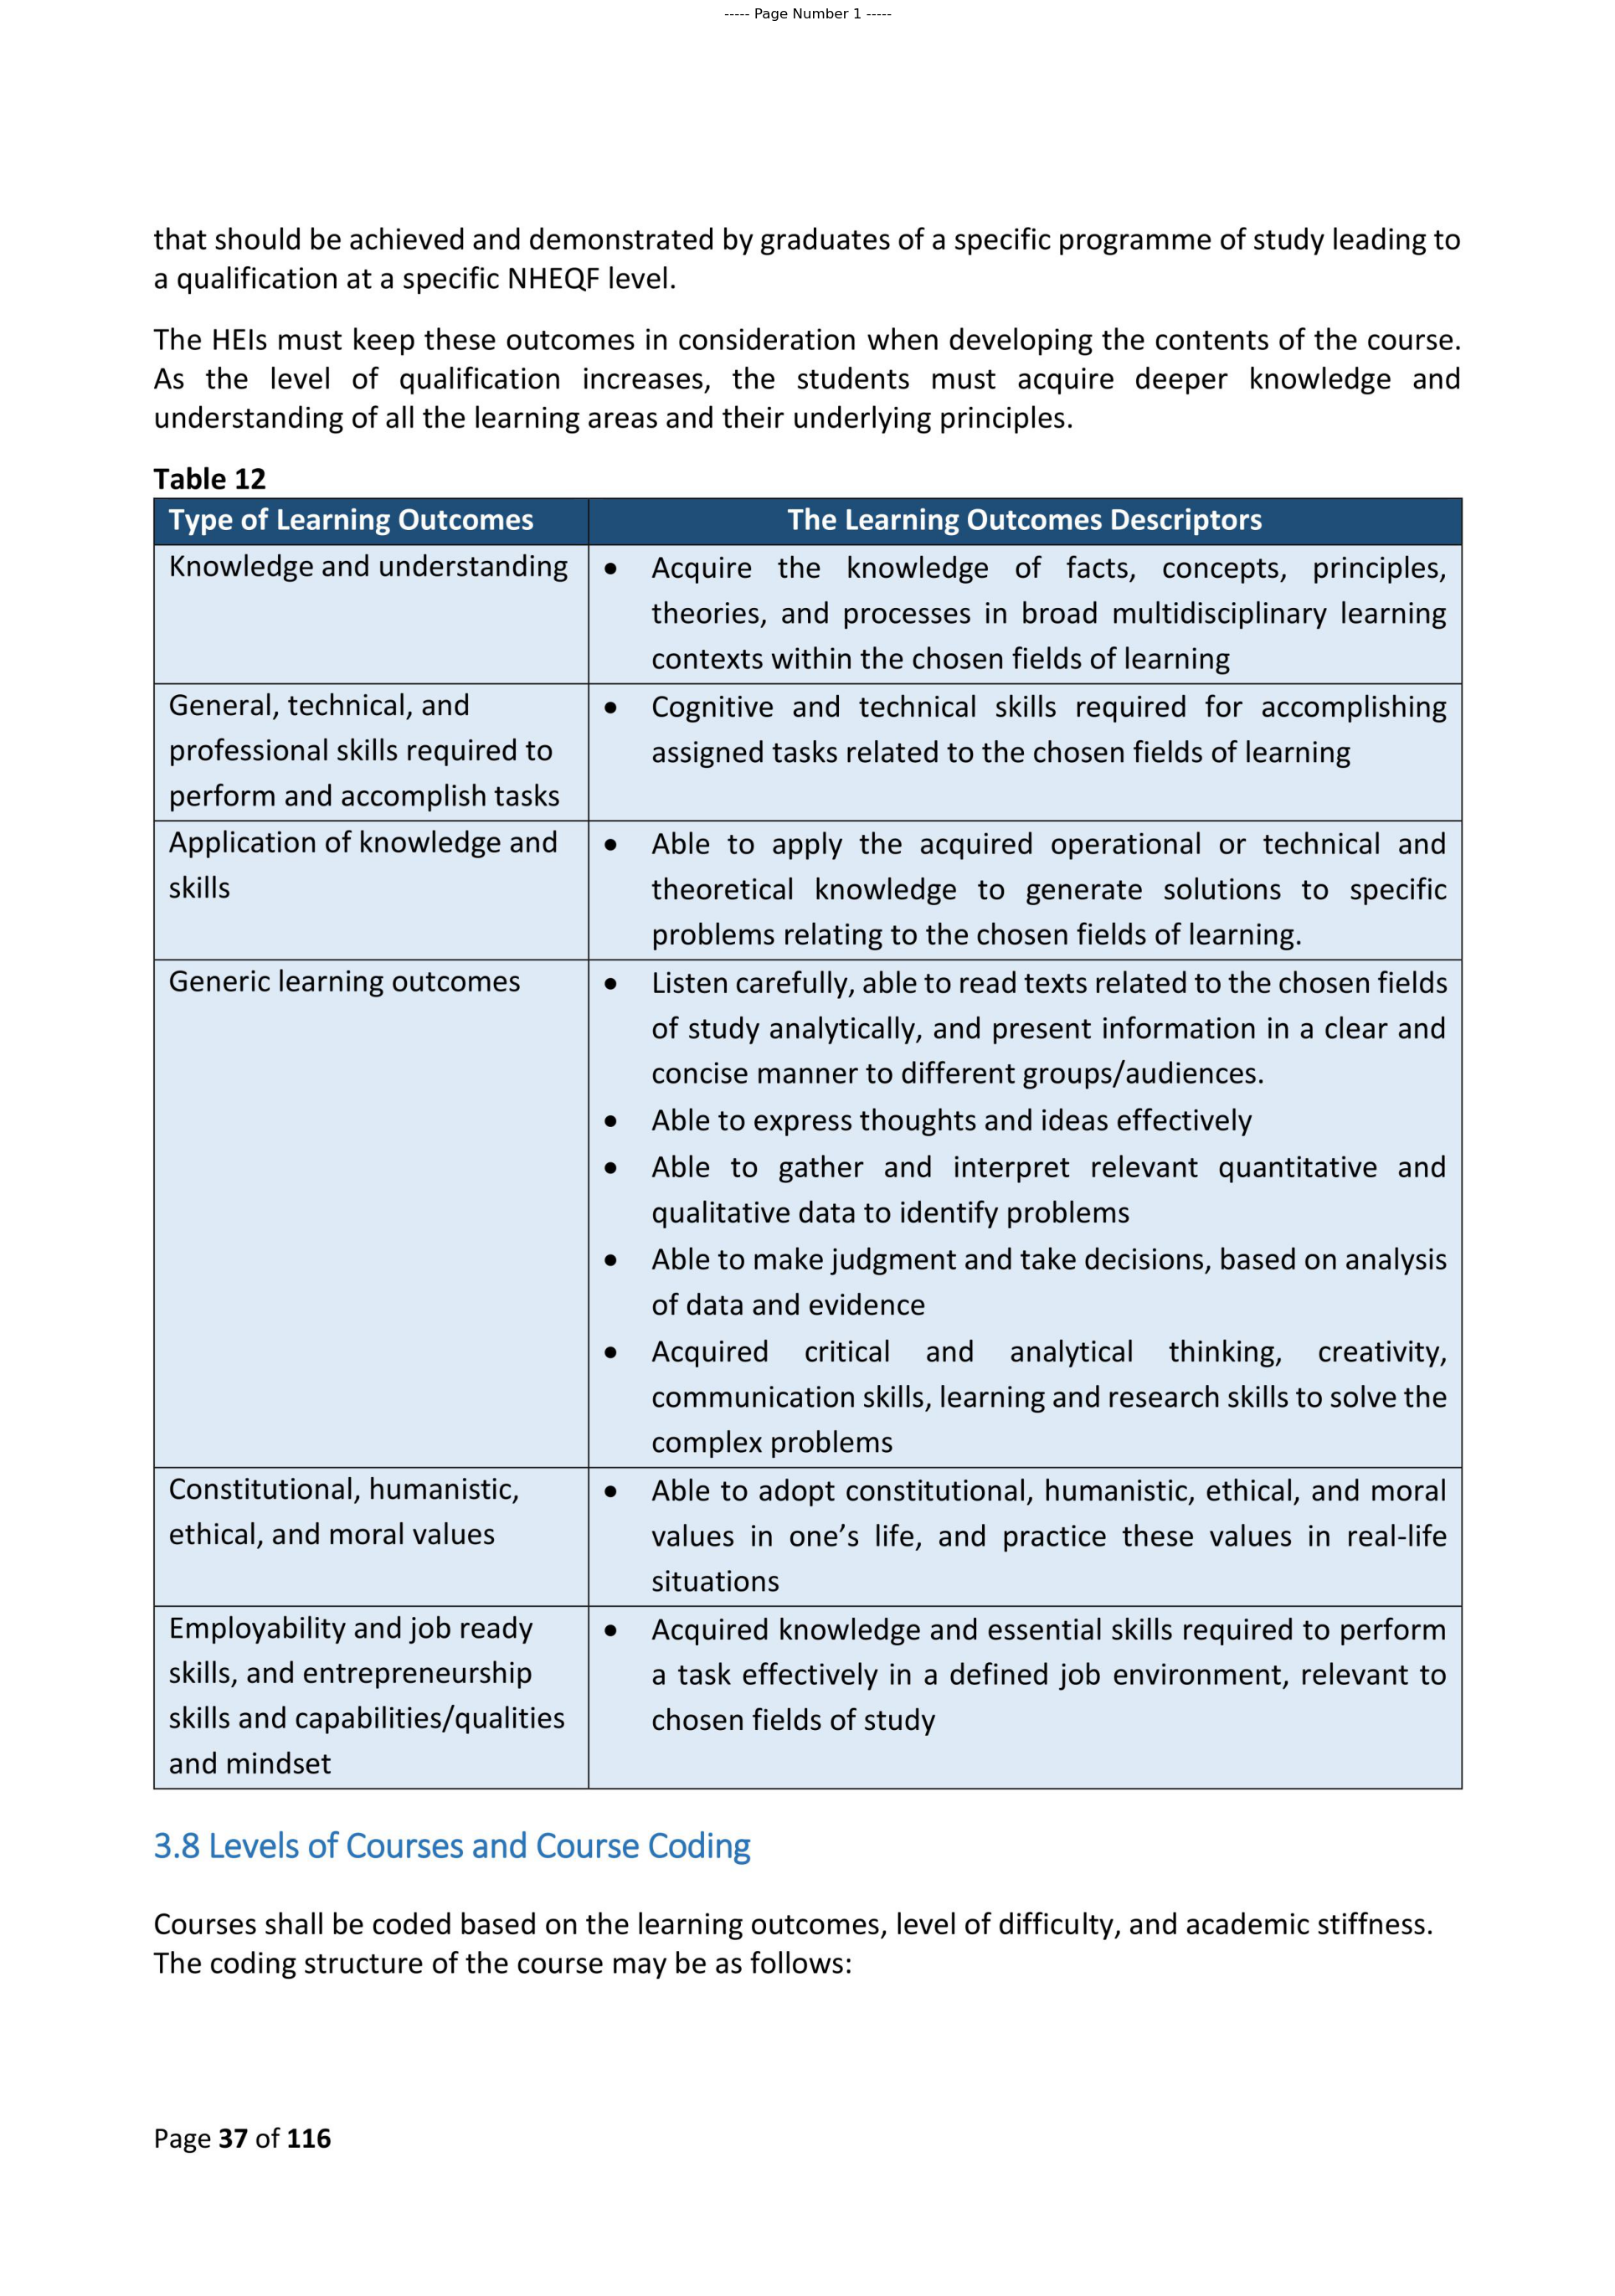

In [6]:
display_images(convert_pdf_to_images)

## PyTesseract

In [7]:
#!pip install pytesseract

In [8]:
from pytesseract import image_to_string 

In [9]:
def extract_text_with_pytesseract(list_dict_final_images):
    
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []
    
    for index, image_bytes in enumerate(image_list):
        
        image = Image.open(BytesIO(image_bytes))
        raw_text = str(image_to_string(image))
        image_content.append(raw_text)
    
    return "\n".join(image_content)

In [10]:
text_with_pytesseract = extract_text_with_pytesseract(convert_pdf_to_images)

print(text_with_pytesseract)

that should be achieved and demonstrated by graduates of a specific programme of study leading to
a qualification at a specific NHEQF level.

The HEls must keep these outcomes in consideration when developing the contents of the course.
As the level of qualification increases, the students must acquire deeper knowledge and
understanding of all the learning areas and their underlying principles.

Table 12
Type of Learning Outcomes

The Learning Outcomes Descriptors

Knowledge and understanding Acquire the knowledge of facts, concepts, principles,
theories, and processes in broad multidisciplinary learning

contexts within the chosen fields of learning

General, technical, and Cognitive and technical skills required for accomplishing
professional skills required to assigned tasks related to the chosen fields of learning

perform and accomplish tasks
Application of knowledge and |e Able to apply the acquired operational or technical and

skills theoretical knowledge to generate solutions 

## EasyOCR

In [11]:
#!pip install easyocr

from easyocr import Reader

# Load model for the English language
language_reader = Reader(["en"])

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [12]:
def extract_text_with_easyocr(list_dict_final_images):
    
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []
    
    for index, image_bytes in enumerate(image_list):
        
        image = Image.open(BytesIO(image_bytes))
        raw_text = language_reader.readtext(image)
        raw_text = "\n".join([res[1] for res in raw_text])
                       
        image_content.append(raw_text)
    
    return "\n".join(image_content)

In [13]:
text_with_easy_ocr = extract_text_with_easyocr(convert_pdf_to_images)
print(text_with_easy_ocr)

that should be achieved and demonstrated by graduates of a specific programme of study leading to
a
qualification at a specific NHEQF level:
The HEls must keep these outcomes in consideration when developing the contents of the course:
As
the
level
of  qualification
increases,
the
students
must
acquire   deeper
knowledge
and
understanding of all the learning areas and their underlying principles.
Table 12
Type of Learning Outcomes
The Learning Outcomes Descriptors
Knowledge and understanding
Acquire
the
knowledge
of
facts,
concepts,
principles,
theories, and processes in broad multidisciplinary learning
contexts within the chosen fields of learning
General, technical, and
Cognitive
and
technical
skills   required
for accomplishing
professional skills required to
assigned tasks related to the chosen fields of learning
perform and accomplish tasks
Application of knowledge and
Able
to apply
the
acquired operational
or  technical
and
skills
theoretical   knowledge
to
generate
solutions
to


## PyPDF

In [14]:
#!pip install PyPDF2

In [15]:
from PyPDF2 import PdfReader

In [16]:
def extract_text_with_pyPDF(PDF_File):

    pdf_reader = PdfReader(PDF_File)
    
    raw_text = ''

    for i, page in enumerate(pdf_reader.pages):
        
        text = page.extract_text()
        if text:
            raw_text += text

    return raw_text

In [22]:
text_with_pyPDF = extract_text_with_pyPDF("1.pdf")
print(text_with_pyPDF)

## LangChain

In [18]:
#!pip install langchain

In [19]:
from langchain.document_loaders.image import UnstructuredImageLoader

def extract_text_with_langchain_image(list_dict_final_images):
    
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []
    
    for index, image_bytes in enumerate(image_list):
        
        image = Image.open(BytesIO(image_bytes))
        loader = UnstructuredImageLoader(image)
        data = loader.load()
        raw_text = data[index].page_content
                       
        image_content.append(raw_text)
    
    return "\n".join(image_content)

In [20]:
text_with_langchain_image = extract_text_with_langchain_image(convert_pdf_to_images)
print(text_with_langchain_image)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not JpegImageFile

In [21]:
from langchain.document_loaders import UnstructuredFileLoader

def extract_text_with_langchain_pdf(pdf_file):
    
    loader = UnstructuredFileLoader(pdf_file)
    documents = loader.load()
    pdf_pages_content = '\n'.join(doc.page_content for doc in documents)
    
    return pdf_pages_content

In [23]:
text_with_langchain_files = extract_text_with_langchain_pdf("1.pdf")
print(text_with_langchain_files)

that should be achieved and demonstrated by graduates of a specific programme of study leading to a qualification at a specific NHEQF level.

The HEls must keep these outcomes in consideration when developing the contents of the course. As the level of qualification increases, the students must acquire deeper knowledge and

understanding of all the learning areas and their underlying principles.

Table 12

Type of Learning Outcomes The Learning Outcomes Descriptors

Knowledge and understanding

Acquire the knowledge of facts, concepts, principles, theories, and processes in broad multidisciplinary learning contexts within the chosen fields of learning

General, technical, and

professional skills required to

perform and accomplish tasks

Cognitive and technical skills required for accomplishing assigned tasks related to the chosen fields of learning

Application of knowledge and

skills

Able to apply the acquired operational or technical and theoretical knowledge to generate solution